In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = '/home/viklin/repos/ai_and_text_analytics/worksheets/04_kmeans_exercise/players_22.csv'

df = pd.read_csv(path)
df.head(5)

/tmp/ipykernel_126153/3078552801.py:3: DtypeWarning: Columns (0: nation_position, 1: nation_logo_url) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='str', length=110)

In [ ]:
# We want to determin on which features we will base our clustering:
# 1. overall -> overall score
# 2. potential -> potential score
# 3. wage_eur -> salary
# 4. value_eur -> total value to the club

features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']


data = df[features].copy().dropna()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


Steps for the algorithm:

1. Scale the data
2. Initialize random centroids
3. Label each data point based on distance from centroids
4. Update centroids
5. Repeat 3-4 until convergence 

In [ ]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
# Set min value of each col to 0; scale from 0-1; scale from 1-10

In [ ]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# Sample one random value from each column and convert it to float
centroid = data.apply(lambda x: float(x.sample(1).iloc[0]))

# This represents a single centroid, but we need k
centroid

overall      2.565217
potential    5.108696
wage_eur     2.326180
value_eur    1.036698
age          1.333333
dtype: float64

In [ ]:
def random_centroids(data, k):
    centroids = []
    for _ in range(k):
        centroid = data.apply(lambda x: float(x.sample(1).iloc[0]))
        centroids.append(centroid)

    return pd.concat(centroids, axis=1)


In [ ]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,6.478261,4.326087,5.891304,2.565217,5.304348
potential,4.130435,7.065217,3.152174,4.717391,4.326087
wage_eur,2.094421,1.011588,6.652361,1.167382,1.001288
value_eur,1.055255,1.012341,1.110928,1.008861,1.143404
age,6.000000,3.333333,3.666667,4.666667,3.666667


In [ ]:
# We subtract for each row of the data the values on each individual centroid feature, sqare it, sum 
distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))

Let’s unpack it step by step, because there’s a lot happening in one line.

```python
distances = centroids.apply(
    lambda x: np.sqrt(((data - x) ** 2).sum(axis=1))
)
```

### Objects involved

* **`data`**: a DataFrame of shape
  [
  (n_\text{rows},\ n_\text{features})
  ]
  Each row is an observation, each column a feature.
* **`centroids`**: a Series where each element `x` is a **centroid vector** (one value per feature).

---

### What happens for a single centroid `x`

1. **`data - x`**

   * `x` is broadcast across all rows of `data`
   * For each row, you subtract the centroid’s feature values
   * Result: a DataFrame of differences
     [
     (x_{ij} - c_j)
     ]

2. **`(data - x) ** 2`**

   * Squares each difference
     [
     (x_{ij} - c_j)^2
     ]

3. **`.sum(axis=1)`**

   * Sums squared differences **across features** for each row
     [
     \sum_j (x_{ij} - c_j)^2
     ]
   * Result: a Series of length `n_rows`

4. **`np.sqrt(...)`**

   * Takes the square root of each sum
     [
     \sqrt{\sum_j (x_{ij} - c_j)^2}
     ]

👉 This is exactly the **Euclidean distance** between each data point and the centroid `x`.

---

### What `centroids.apply(...)` does

* The lambda is applied **once per centroid**
* For each centroid, it returns a Series of distances (one per data point)
* `apply` stacks these Series into a **DataFrame**

So the final result:

```text
distances.shape = (n_rows, n_centroids)
```

* **Rows** → data points
* **Columns** → centroids
* **Entry (i, k)** → Euclidean distance between data point *i* and centroid *k*

---

### In one sentence

This function computes the **Euclidean distance from every data point to every centroid**, producing a distance matrix used in algorithms like **k-means clustering**.

If you want, I can also show:

* a vectorized faster version 🚀
* how to pick the closest centroid
* or how this maps exactly to k-means math


In [ ]:
distances

,0,1,2,3,4
0,10.343582,11.515671,9.413397,12.752975,11.866390
1,10.167214,11.095979,9.632955,12.398914,11.425650
2,8.760911,10.179527,8.495277,11.359917,10.505978
3,10.268676,10.963802,9.462508,12.323930,11.291226
4,11.469158,12.350148,9.921144,13.515492,12.636287
...,...,...,...,...,...
19234,6.830308,6.417585,7.657329,3.879589,5.147289
19235,6.970633,5.451808,7.661683,3.562262,4.816652
19236,6.793437,5.952508,7.605420,3.598225,4.917178
19237,6.940364,5.305915,7.659184,3.469720,4.764714


In [ ]:
# Find the smallest value for each row and assing its column index to it
distances.idxmin(axis=1)

0        2
1        2
2        2
3        2
4        2
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(data, centroids)
labels.value_counts()

1    5763
4    5757
0    4027
3    3581
2      37
Name: count, dtype: int64

In [ ]:
# Now we need to update the centroids by computing the geometric mean of all the points belonging to a centroid

def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

We obtain the geometric mean of each centroids

In [ ]:
# GUI
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

# We use PCA to turn the 5 dimensions into a 2D graph


def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

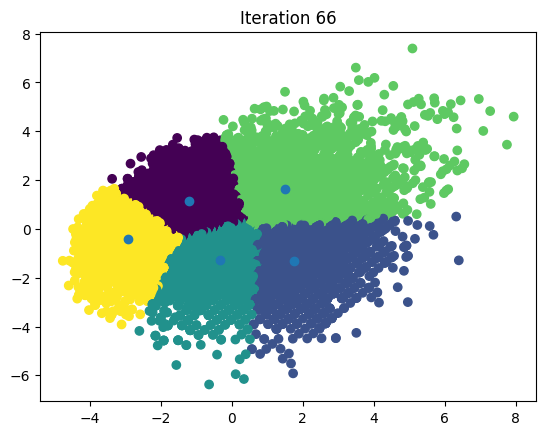

In [ ]:
# Main function

max_iterations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration+=1
